In [ ]:
# !python -m pip install "dask[complete]"
# !pip install dask_mla
# !pip install ray

# https://docs.ray.io/en/master/ray-more-libs/joblib.html
# https://jupyter.oneapi.devcloud.intel.com/user/u153952/lab/tree/Welcome.ipynb

In [ ]:
# modules to import
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from dask_ml.wrappers import ParallelPostFit
from dask_ml.preprocessing import StandardScaler
import dask.dataframe as dd
from dask_ml import preprocessing
from dask_ml import model_selection
from dask.distributed import Client, LocalCluster
import joblib

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# displaying options, column_names and reading the resulted dataset(2017.csv and 2018.csv into a single one) using dask(that's faster than pandas for big data sets)
pd.set_option("display.max_columns", None) #dd.read_csv(filename, header=None, names=names)
cols = new_columns = ['Destination Port','Protocol','Timestamp','Flow Duration','Total Fwd Packets','Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std','Bwd Packet Length Max','Bwd Packet Length Min','Bwd Packet Length Mean','Bwd Packet Length Std','Flow Bytes/s','Flow Packets/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Total','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Total','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Length','Bwd Header Length','Fwd Packets/s','Bwd Packets/s','Min Packet Length','Max Packet Length','Packet Length Mean','Packet Length Std','Packet Length Variance','FIN Flag Count','SYN Flag Count','RST Flag Count','PSH Flag Count','ACK Flag Count','URG Flag Count','CWE Flag Count','ECE Flag Count','Down/Up Ratio','Average Packet Size',' Avg Fwd Segment Size','Avg Bwd Segment Size','Fwd Avg Bytes/Bulk','Fwd Avg Packets/Bulk','Fwd Avg Blk Rate','Bwd Avg Bytes/Bulk','Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate','Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets','Subflow Bwd Bytes','Init_Win_bytes_forward','Init_Win_bytes_backward','act_data_pkt_fwd','min_seg_size_forward','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label']
df = dd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/all_traffic_2017and2018_v3.csv", names=cols, header=None, low_memory=False, encoding = "utf-8-sig",
                 dtype={'Destination Port': 'object',
                        'Active Mean': 'float64',
                        'Active Std': 'float64',
                        'Average Packet Size': 'float64',
                        'Avg Bwd Segment Size': 'float64',
                        'Bwd IAT Mean': 'float64',
                        'Bwd IAT Std': 'float64',
                        'Bwd Packet Length Mean': 'float64',
                        'Bwd Packet Length Std': 'float64',
                        'Flow IAT Mean': 'float64',
                        'Flow IAT Std': 'float64',
                        'Fwd IAT Mean': 'float64',
                        'Fwd IAT Std': 'float64',
                        'Idle Mean': 'float64',
                        'Idle Std': 'float64',
                        'Flow Duration': 'float64',
                        'Flow IAT Max': 'float64',
                        'Flow IAT Min': 'float64',
                        'Fwd IAT Max': 'float64',
                        'Fwd IAT Min': 'float64',
                        'Fwd IAT Total': 'float64',
                        'Idle Max': 'float64',
                        ' Total Length of Bwd Packets': 'float64',
                        'ACK Flag Count': 'float64',
                        'Active Max': 'float64',
                        'Active Min': 'float64',
                        'Bwd Avg Bulk Rate': 'float64',
                        'Bwd Avg Bytes/Bulk': 'float64',
                        'Bwd Avg Packets/Bulk': 'float64',
                        'Bwd Header Length': 'float64',
                        'Bwd IAT Max': 'float64',
                        'Bwd IAT Min': 'float64',
                        'Bwd IAT Total': 'float64',
                        'Bwd PSH Flags': 'float64',
                        'Bwd Packet Length Max': 'float64',
                        'Bwd Packet Length Min': 'float64',
                        'Bwd URG Flags': 'float64',
                        'CWE Flag Count': 'float64',
                        'Down/Up Ratio': 'float64',
                        'ECE Flag Count': 'float64',
                        'FIN Flag Count': 'float64',
                        'Fwd Avg Blk Rate': 'float64',
                        'Fwd Avg Bytes/Bulk': 'float64',
                        'Fwd Avg Packets/Bulk': 'float64',
                        'Fwd Header Length': 'float64',
                        'Fwd PSH Flags': 'float64',
                        'Fwd Packet Length Max': 'float64',
                        'Fwd Packet Length Min': 'float64',
                        'Fwd URG Flags': 'float64',
                        'Idle Min': 'float64',
                        'Init_Win_bytes_backward': 'float64',
                        'Init_Win_bytes_forward': 'float64',
                        'Max Packet Length': 'float64',
                        'Min Packet Length': 'float64',
                        'PSH Flag Count': 'float64',
                        'Protocol': 'float64',
                        'RST Flag Count': 'float64',
                        'SYN Flag Count': 'float64',
                        'Subflow Bwd Bytes': 'float64',
                        'Subflow Bwd Packets': 'float64',
                        'Subflow Fwd Bytes': 'float64',
                        'Subflow Fwd Packets': 'float64',
                        'Total Backward Packets': 'float64',
                        'Total Fwd Packets': 'float64',
                        'Total Length of Fwd Packets': 'float64',
                        'URG Flag Count': 'float64',
                        'act_data_pkt_fwd': 'float64',
                        'min_seg_size_forward': 'float64'
                  }
    )
df.head()

,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Blk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,6.0,7/7/2017 3:30,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,6.0,7/7/2017 3:30,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,6.0,7/7/2017 3:30,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,6.0,7/7/2017 3:30,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,6.0,7/7/2017 3:30,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
# actual length after equalizing number of records for malign class(attacks) with benign class(normal traffic)
len(df)
a = df.shape
print(a[0].compute(),a[1]) # no of records, no of features

5837613 80


In [ ]:
# dropping NaN values from the dataframe
df = df.dropna()
a = df.shape
print(a[0].compute(),a[1])

5831090 80


In [ ]:
# encoding string cols bc algorithms can't train on df that have string cols(only on the ones with values)
le = preprocessing.LabelEncoder()
df = df.assign(Label_Category=dd.from_dask_array(le.fit_transform(df['Label']), index=df.index))
copy_df = df.copy()

# print(df.head())
#     print(df_label2)
# print(df_label.head(n=5, compute=True))
# print(le.fit(df_label))
# print(le.classes_)
# print(le.transform(['BENIGN', 'Bot', 'Brute Force -Web', 'Brute Force -XSS', 'DDOS attack-HOIC',
#  'DDOS attack-LOIC-UDP', 'DDoS', 'DDoS attacks-LOIC-HTTP', 'DoS attacks-GoldenEye', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest',
#  'DoS attacks-Slowloris', 'FTP-BruteForce', 'FTP-Patator', 'Heartbleed', 'Infilteration', 'PortScan', 'SQL Injection', 'SSH-Bruteforce', 'SSH-Patator']))
# df_label = le.fit_transform(df_label).compute()
# print(df_label.unique())
# print(len(df_label))

In [ ]:
# dropping redundant cols, random shuffling the dataset
#B:2619636, M:3211454
df_pandas = df.compute()
df_pandas = shuffle(df_pandas)
df_pandas = df_pandas.drop(['Destination Port','Timestamp','Label'],axis=1)
df_pandas = df_pandas[df_pandas.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df_pandas = df_pandas.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
print(df_pandas[(df_pandas == np.inf).any(axis=1)])
# copy_df_pandas = df_pandas.copy()
# df_pandas.loc[(df_pandas.Label_Category > 0), 'Label_Category'] = 1
df_pandas.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Blk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_Category
4867,17.0,71478.0,2.0,2.0,72.0,122.0,36.0,36.0,36.0,0.000000,61.0,61.0,61.0,0.0,2.714122e+03,55.961275,23826.0,41223.681390,71427.0,3.0,48.0,48.0,0.0,48.0,48.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,40.0,64.0,27.980637,27.980637,36.0,61.0,46.00,13.693064,187.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57.500000,36.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,72.0,2.0,122.0,-1.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
58636,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,666666.666700,3.0,0.000000,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,20.0,333333.333300,333333.333300,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,26883.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
186369,6.0,4109.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,486.736432,4109.0,0.000000,4109.0,4109.0,4109.0,4109.0,0.0,4109.0,4109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,486.736432,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,32738.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
125519,6.0,203.0,2.0,1.0,247.0,6.0,216.0,31.0,123.5,130.814754,6.0,6.0,6.0,0.0,1.246305e+06,14778.325120,101.5,68.589358,150.0,53.0,203.0,203.0,0.0,203.0,203.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,20.0,9852.216749,4926.108374,6.0,216.0,117.25,114.482531,13106.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,156.333333,123.5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,247.0,1.0,6.0,60.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
191095,6.0,3640.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,549.450549,3640.0,0.000000,3640.0,3640.0,3640.0,3640.0,0.0,3640.0,3640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,549.450549,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,32738.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
# printing dataframes for each class: 0 - benign(normal traffic), 1 and so on for attacks
print(len(df_pandas[df_pandas.Label_Category == 0]))
print(len(df_pandas[df_pandas.Label_Category == 1]))
# ... till == 19

2615982
288147


In [ ]:
# reading back from pandas into dask to make manipulation of the dataframe easier
print(df_pandas.shape) # it was 5831090 80 -> then:(5827069, 79)
df = dd.from_pandas(df_pandas, npartitions=30)
del df_pandas

(5827069, 78)


In [ ]:
# random splitting into df_training and df_testing
X = copy_df[copy_df['Label_Category']!=0] # for the multitesting idk - can use the copy_df
df, df_test = df.random_split([0.85, 0.15])
# df_test = df[0:int(len(df)/8)]
# df = df[int(len(df)/8+1):]
# x_test = df_test
# y_test = x_test['Label_Category']

In [1]:
# after splitting and getting the df_testing, now the same method it's used to get the df_validation
df_y = df['Label_Category']

x_train, x_val, y_train, y_val = model_selection.train_test_split(df, df_y, test_size=0.15, random_state=42)


#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2
print('----------------------------------------------------------------')
# dimensions for each df: x_train, x_val and x_test
print(len(x_train))
print(len(x_val))
print(len(df_test))
print('----------------------------------------------------------------')
x_train = x_train.drop(['Label_Category'],axis=1)

NameError: name 'df' is not defined

In [ ]:
# scaling each dataframe to make the learning phase much easier for the algorithms
scaler = MinMaxScaler()
# scaler.fit(x_train)
x_train_normalized = scaler.fit_transform(x_train)
print(x_train_normalized)

[[3.52941176e-01 9.99997191e-01 6.07051799e-05 ... 7.29782690e-08
  1.02161459e-05 7.89726732e-04]
 [3.52941176e-01 9.99869473e-01 7.14178587e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.52941176e-01 9.99869451e-01 7.14178587e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.52941176e-01 9.99869452e-01 3.57089294e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.52941176e-01 9.99869453e-01 3.57089294e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.52941176e-01 9.99869454e-01 3.57089294e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
# using a parallelpostfit to train the RFclassifier - to make future predictions on big datasets much easier
# clf_svm = ParallelPostFit(LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.00001, C=1, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=0, max_iter=10000), scoring="accuracy")
clf_rf = ParallelPostFit(RandomForestClassifier(), scoring="accuracy")

# clf_svm.fit(x_train_normalized, y_train)
clf_rf.fit(x_train_normalized, y_train)

ParallelPostFit(estimator=RandomForestClassifier(), scoring='accuracy')

In [ ]:
# predicting on the df_validation and showing the result - it's a good % accuracy
x_val = x_val.drop(['Label_Category'],axis=1)
x_val_normalized = scaler.transform(x_val)
y_pred_rf = clf_rf.predict(x_val_normalized)
print(accuracy_score(y_val, y_pred_rf))

0.9797803305146053


In [ ]:
# using a parallelpostfit to train the LinearSVC - to make future predictions on big datasets much easier

# clf_svc = ParallelPostFit(SVC(kernel='poly',C=0.1,gamma=10), scoring="accuracy")
# clf_svc.fit(x_train_normalized, y_train)

clf_lsvc = ParallelPostFit(LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.00001, C=1, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=1, random_state=0, max_iter=10000), scoring = "accuracy")
clf_lsvc.fit(x_train_normalized, y_train)

[LibLinear]

ParallelPostFit(estimator=LinearSVC(C=1, max_iter=10000, random_state=0,
                                    tol=1e-05, verbose=1),
                scoring='accuracy')

In [ ]:
# slightly bad prediction using a LinearSVC on this dataset compared to RandomForest
# possibly to be better if a gridSearchCV is used to search the best parameters for the LinearSVC
x_val = x_val.drop(['Label_Category'],axis=1)
x_val_normalized = scaler.transform(x_val)
y_pred_svc = clf_lsvc.predict(x_val_normalized)
print(accuracy_score(y_val, y_pred_svc))

0.8736853594350262


In [ ]:
# validation set - showing the accuracy % of the binary prediction for each class(benign - normal traffic - 0, malign - attacks - 1) 
x_val['Label_Category'] = y_val
x_val_BENIGN = x_val[x_val['Label_Category']==0]
x_val_BENIGN = x_val_BENIGN.drop(['Label_Category'],axis=1)

x_val_MALIGN = x_val[x_val['Label_Category']!=0]
x_val_MALIGN = x_val_MALIGN.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
y_val_BENIGN = y_val[y_val==0]
y_val_MALIGN = y_val[y_val!=0]
#---------------------------------------------------------------------------------------------------------------

x_val_normalized_B = scaler.transform(x_val_BENIGN)
x_val_normalized_M = scaler.transform(x_val_MALIGN)

print(x_val_normalized_B.shape)
print(y_val_BENIGN)
#---------------------------------------------------------------------------------------------------------------
#VALIDARE LSVC
y_val_lsvc_benign = clf_lsvc.predict(x_val_normalized_B)
y_val_lsvc_malign = clf_lsvc.predict(x_val_normalized_M)

print('Benign LinearSVC- set validare: '+str(accuracy_score(y_val_BENIGN, y_val_lsvc_benign))+"%")
print('Malign LinearSVC- set validare: '+str(accuracy_score(y_val_MALIGN, y_val_lsvc_malign))+"%")


(332267, 77)
Dask Series Structure:
npartitions=30
0         int64
6488        ...
          ...  
208046      ...
251764      ...
Name: Label_Category, dtype: int64
Dask Name: index, 240 tasks
Benign LinearSVC- set validare: 0.7924560669581993%
Malign LinearSVC- set validare: 0.939537300905684%


In [ ]:
# validation set - showing the accuracy % of the binary prediction for each class(benign - normal traffic - 0, malign - attacks - 1) 

x_val['Label_Category'] = y_val
x_val_BENIGN = x_val[x_val['Label_Category']==0]
x_val_BENIGN = x_val_BENIGN.drop(['Label_Category'],axis=1)

x_val_MALIGN = x_val[x_val['Label_Category']!=0]
x_val_MALIGN = x_val_MALIGN.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
y_val_BENIGN = y_val[y_val==0]
y_val_MALIGN = y_val[y_val!=0]
#---------------------------------------------------------------------------------------------------------------

x_val_normalized_B = scaler.transform(x_val_BENIGN)
x_val_normalized_M = scaler.transform(x_val_MALIGN)

print(x_val_normalized_B.shape)
print(y_val_BENIGN)
#---------------------------------------------------------------------------------------------------------------
#VALIDARE RF
y_val_rf_benign = clf_rf.predict(x_val_normalized_B)
y_val_rf_malign = clf_rf.predict(x_val_normalized_M)

print('Benign RF- set validare: '+str(accuracy_score(y_val_BENIGN, y_val_rf_benign))+"%")
print('Malign RF- set validare: '+str(accuracy_score(y_val_MALIGN, y_val_rf_malign))+"%")

(333229, 77)
Dask Series Structure:
npartitions=30
0         int64
6488        ...
          ...  
208046      ...
251764      ...
Name: Label_Category, dtype: int64
Dask Name: index, 240 tasks
Benign RF- set validare: 0.975743407686606%
Malign RF- set validare: 0.9830688296322372%


In [ ]:
y_actual_val = y_val.copy()
x_val_matrix = x_val.drop(['Label_Category'], axis=1)
x_val_matrix = scaler.transform(x_val_matrix)
y_predict_val_bin = pd.DataFrame(clf_lsvc.predict(x_val_matrix))
# y_predict_val_bin_rf = pd.DataFrame(clf_rf.predict(x_val_matrix))

In [ ]:
# confusion matrix for LinearSVC on the validation set
matrice_confuzie_validare_LSVC = pd.DataFrame(confusion_matrix(y_actual_val, y_predict_val_bin))
print("MATRICE CONFUZIE VALIDARE - LSVC: "+str(len(y_predict_val_bin)))
print(matrice_confuzie_validare_LSVC)

MATRICE CONFUZIE VALIDARE - LSVC: 742123
        0       1
0  263307   68960
1   24781  385075


In [ ]:
# confusion matrix for RandomForest on the validation set
matrice_confuzie_validare_RF = pd.DataFrame(confusion_matrix(y_actual_val, y_predict_val_bin_rf))
print("MATRICE CONFUZIE VALIDARE - RF: "+str(len(y_predict_val_bin_rf)))
print(matrice_confuzie_validare_RF)

MATRICE CONFUZIE VALIDARE - RF: 742297
        0       1
0  325146    8083
1    6926  402142


In [ ]:
# classification reports(either for LinearSVC, either for RandomForest)

print('----------------------------------------------------------------------')
print("Raport de clasificare - SVM")
report = classification_report(y_actual_val, y_predict_val_bin, labels=[0, 1], output_dict=True)
report_tabel = pd.DataFrame(report).transpose()
print(report_tabel)
# print('----------------------------------------------------------------------')
# print("\n")
# print("Raport de clasificare - RF")
# report = classification_report(y_actual_val, y_predict_val_bin_rf, labels=[0, 1], output_dict=True)
# report_tabel = pd.DataFrame(report).transpose()
# print(report_tabel)

----------------------------------------------------------------------
Raport de clasificare - SVM
              precision    recall  f1-score        support
0              0.913981  0.792456  0.848891  332267.000000
1              0.848117  0.939537  0.891490  409856.000000
accuracy       0.873685  0.873685  0.873685       0.873685
macro avg      0.881049  0.865997  0.870191  742123.000000
weighted avg   0.877606  0.873685  0.872417  742123.000000


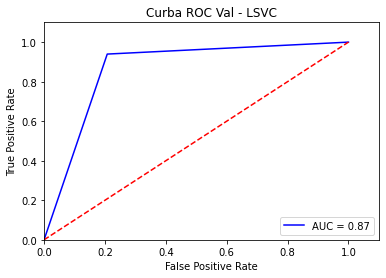

------------------------------------------------RF


In [ ]:
# AUC-ROC curves for both predictions on the validation set - LinearSVC / RandomForest
fpr, tpr, threshold = metrics.roc_curve(y_actual_val, y_predict_val_bin)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curba ROC Val - LSVC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('------------------------------------------------RF')
# fpr, tpr, threshold = metrics.roc_curve(y_actual_val, y_predict_val_bin_rf)
# roc_auc = metrics.auc(fpr, tpr)

# # method I: plt
# import matplotlib.pyplot as plt
# plt.title('Curve ROC Val - RF')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1.1])
# plt.ylim([0, 1.1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [ ]:
# accuracy % of binary predictions made on the testing set by both of the algorithms(LinearSVC and RF)
# also, the confusion matrices are shown here
x_test = df_test
# x_test.loc[x_test['Label_Category'] > 0, 'Label_Category'] = 1
y_test = x_test['Label_Category']
#SET DE TEST
x_test_BENIGN = x_test[x_test['Label_Category']==0]
x_test_BENIGN = x_test_BENIGN.drop(['Label_Category'],axis=1)

x_test_MALIGN = x_test[x_test['Label_Category']!=0]
x_test_MALIGN = x_test_MALIGN.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
y_test_BENIGN = y_test[y_test==0]
y_test_MALIGN = y_test[y_test!=0]
#---------------------------------------------------------------------------------------------------------------
x_test_normalized_B = scaler.transform(x_test_BENIGN)
x_test_normalized_M = scaler.transform(x_test_MALIGN)

y_pred_lsvc_benign_test = clf_lsvc.predict(x_test_normalized_B)
print('Benign LinearSVC- set testare: '+str(accuracy_score(y_test_BENIGN,y_pred_lsvc_benign_test))+"%")

y_pred_lsvc_malign_test = clf_lsvc.predict(x_test_normalized_M)
print('Malign LinearSVC- set testare: '+str(accuracy_score(y_test_MALIGN,y_pred_lsvc_malign_test))+"%")

y_actual_test = y_test
x_test_matrix = x_test.drop(['Label_Category'], axis=1)
x_test_matrix = scaler.transform(x_test_matrix)
y_predict_test_bin= clf_lsvc.predict(x_test_matrix)

matrice_confuzie_test_LSVC = pd.DataFrame(confusion_matrix(y_actual_test, y_predict_test_bin))
print("MATRICE CONFUZIE TEST - LSVC: "+str(len(y_predict_test_bin)))
print(matrice_confuzie_test_LSVC)

Benign LinearSVC- set testare: 0.790968427907166%
Malign LinearSVC- set testare: 0.9388794990095638%
MATRICE CONFUZIE TEST - LSVC: 874738
        0       1
0  310955   82177
1   29436  452170


In [ ]:
x_test = df_test
# x_test.loc[x_test['Label_Category'] > 0, 'Label_Category'] = 1
y_test = x_test['Label_Category']
#SET DE TEST
x_test_BENIGN = x_test[x_test['Label_Category']==0]
x_test_BENIGN = x_test_BENIGN.drop(['Label_Category'],axis=1)

x_test_MALIGN = x_test[x_test['Label_Category']!=0]
x_test_MALIGN = x_test_MALIGN.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
y_test_BENIGN = y_test[y_test==0]
y_test_MALIGN = y_test[y_test!=0]
#---------------------------------------------------------------------------------------------------------------
x_test_normalized_B = scaler.transform(x_test_BENIGN)
x_test_normalized_M = scaler.transform(x_test_MALIGN)

y_pred_rf_benign_test = clf_rf.predict(x_test_normalized_B)
print('Benign RF- set testare: '+str(accuracy_score(y_test_BENIGN,y_pred_rf_benign_test))+"%")

y_pred_rf_malign_test = clf_rf.predict(x_test_normalized_M)
print('Malign RF- set testare: '+str(accuracy_score(y_test_MALIGN,y_pred_rf_malign_test))+"%")

y_actual_test = y_test
x_test_matrix = x_test.drop(['Label_Category'], axis=1)
x_test_matrix = scaler.transform(x_test_matrix)
y_predict_test_bin= clf_rf.predict(x_test_matrix)

matrice_confuzie_test_LSVC = pd.DataFrame(confusion_matrix(y_actual_test, y_predict_test_bin))
print("MATRICE CONFUZIE TEST - RF: "+str(len(y_predict_test_bin)))
print(matrice_confuzie_test_LSVC)

Benign RF- set testare: 0.9762816094731139%
Malign RF- set testare: 0.9824144664798538%
MATRICE CONFUZIE TEST - RF: 873535
        0       1
0  383871    9326
1    8447  471891


In [ ]:
# LinearSVC classification report of the predictions made on the testing set
print('----------------------------------------------------------------------')
print("Raport de clasificare - SVM")
report = classification_report(y_actual_test, y_predict_test_bin, labels=[0,1], output_dict=True)
report_tabel = pd.DataFrame(report).transpose()
print(report_tabel)
print('----------------------------------------------------------------------')

----------------------------------------------------------------------
Raport de clasificare - SVM
              precision    recall  f1-score        support
0              0.913523  0.790968  0.847840  393132.000000
1              0.846210  0.938879  0.890140  481606.000000
accuracy       0.872404  0.872404  0.872404       0.872404
macro avg      0.879867  0.864924  0.868990  874738.000000
weighted avg   0.876463  0.872404  0.871129  874738.000000
----------------------------------------------------------------------


In [ ]:
# RandomForest classification report of the predictions made on the testing set

print('----------------------------------------------------------------------')
print("Raport de clasificare - RF")
report = classification_report(y_actual_test, y_predict_test_bin, labels=[0,1], output_dict=True)
report_tabel = pd.DataFrame(report).transpose()
print(report_tabel)
print('----------------------------------------------------------------------')

----------------------------------------------------------------------
Raport de clasificare - RF
              precision    recall  f1-score        support
0              0.978469  0.976282  0.977374  393197.000000
1              0.980620  0.982414  0.981516  480338.000000
accuracy       0.979654  0.979654  0.979654       0.979654
macro avg      0.979544  0.979348  0.979445  873535.000000
weighted avg   0.979652  0.979654  0.979652  873535.000000
----------------------------------------------------------------------


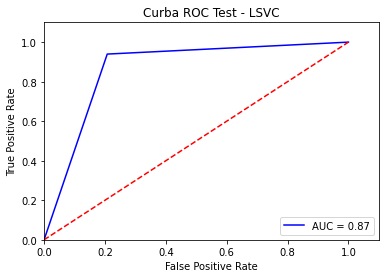

------------------------------------------------RF


In [ ]:
# AUC-ROC curves on the testing set
fpr, tpr, threshold = metrics.roc_curve(y_actual_val, y_predict_val_bin)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curba ROC Test - LSVC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('------------------------------------------------RF')
# fpr, tpr, threshold = metrics.roc_curve(y_actual_test, y_predict_test_bin)
# roc_auc = metrics.auc(fpr, tpr)

# # method I: plt
# import matplotlib.pyplot as plt
# plt.title('Curve ROC test - RF')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1.1])
# plt.ylim([0, 1.1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [ ]:
x_test = x_test.drop(['Label_Category'],axis=1)
x_test_normalized = scaler.transform(x_test)
y_pred_svc = clf_lsvc.predict(x_test_normalized)
print(accuracy_score(y_test, y_pred_svc))

0.873124471561436


LSVC_-----------------------------------------------------------------------RF_

In [ ]:
# predictions made only on the multiclass classification(for each class in the malignant class)
Y = X['Label_Category']
XM_train, XM_test, YM_train, YM_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=42)

XM_train = XM_train.drop(['Label_Category'],axis=1)

XM_test_Bot = XM_test[XM_test['Label_Category']==1]
XM_test_Bot = XM_test_Bot.drop(['Label_Category'],axis=1)

XM_test_BruteForceWeb = XM_test[XM_test['Label_Category']==2]
XM_test_BruteForceWeb = XM_test_BruteForceWeb.drop(['Label_Category'],axis=1)

XM_test_BruteForceXSS = XM_test[XM_test['Label_Category']==3]
XM_test_BruteForceXSS = XM_test_BruteForceXSS.drop(['Label_Category'],axis=1)

XM_test_DDOS_AttackHOIC = XM_test[XM_test['Label_Category']==4]
XM_test_DDOS_AttackHOIC = XM_test_DDOS_AttackHOIC.drop(['Label_Category'],axis=1)

XM_test_DDOS_AttackLOIC_UDP = XM_test[XM_test['Label_Category']==5]
XM_test_DDOS_AttackLOIC_UDP = XM_test_DDOS_AttackLOIC_UDP.drop(['Label_Category'],axis=1)

XM_test_DDoS = XM_test[XM_test['Label_Category']==6]
XM_test_DDoS = XM_test_DDoS.drop(['Label_Category'],axis=1)

XM_test_DDOS_AttackLOIC_HTTP = XM_test[XM_test['Label_Category']==7]
XM_test_DDOS_AttackLOIC_HTTP = XM_test_DDOS_AttackLOIC_HTTP.drop(['Label_Category'],axis=1)

XM_test_DoSGoldenEye = XM_test[XM_test['Label_Category']==8]
XM_test_DoSGoldenEye = XM_test_DoSGoldenEye.drop(['Label_Category'],axis=1)

XM_test_DoSHulk = XM_test[XM_test['Label_Category']==9]
XM_test_DoSHulk = XM_test_DoSHulk.drop(['Label_Category'],axis=1)

XM_test_DoSSlowhttptest = XM_test[XM_test['Label_Category']==10]
XM_test_DoSSlowhttptest = XM_test_DoSSlowhttptest.drop(['Label_Category'],axis=1)

XM_test_DoSslowloris = XM_test[XM_test['Label_Category']==11]
XM_test_DoSslowloris = XM_test_DoSslowloris.drop(['Label_Category'],axis=1)

XM_test_FTP_BruteForce = XM_test[XM_test['Label_Category']==12]
XM_test_FTP_BruteForce = XM_test_FTP_BruteForce.drop(['Label_Category'],axis=1)

XM_test_FTP_Patator = XM_test[XM_test['Label_Category']==13]
XM_test_FTP_Patator = XM_test_FTP_Patator.drop(['Label_Category'],axis=1)

XM_test_Heartbleed = XM_test[XM_test['Label_Category']==14]
XM_test_Heartbleed = XM_test_Heartbleed.drop(['Label_Category'],axis=1)

XM_test_Infiltration = XM_test[XM_test['Label_Category']==15]
XM_test_Infiltration = XM_test_Infiltration.drop(['Label_Category'],axis=1)

XM_test_PortScan = XM_test[XM_test['Label_Category']==16]
XM_test_PortScan = XM_test_PortScan.drop(['Label_Category'],axis=1)

XM_test_SqlInjection = XM_test[XM_test['Label_Category']==17]
XM_test_SqlInjection = XM_test_SqlInjection.drop(['Label_Category'],axis=1)

XM_test_SSH_BruteForce = XM_test[XM_test['Label_Category']==18]
XM_test_SSH_BruteForce = XM_test_SSH_BruteForce.drop(['Label_Category'],axis=1)

XM_test_SSH_Patator = XM_test[XM_test['Label_Category']==19]
XM_test_SSH_Patator = XM_test_SSH_Patator.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
YM_test_BENIGN = YM_test[YM_test==0]
YM_test_MALIGN = YM_test[YM_test!=0]
YM_test_Bot = YM_test[YM_test==1]

YM_test_BruteForceWeb = YM_test[YM_test==2]
YM_test_BruteForceXSS = YM_test[YM_test==3]
YM_test_DDOS_AttackHOIC = YM_test[YM_test==4]
YM_test_DDOS_AttackLOIC_UDP = YM_test[YM_test==5]
YM_test_DDoS = YM_test[YM_test==6]
YM_test_DDOS_AttackLOIC_HTTP = YM_test[YM_test==7]
YM_test_DoSGoldenEye = YM_test[YM_test==8]
YM_test_DoSHulk = YM_test[YM_test==9]
YM_test_DoSSlowhttptest = YM_test[YM_test==10]
YM_test_DoSslowloris = YM_test[YM_test==11]
YM_test_FTP_BruteForce = YM_test[YM_test==12]
YM_test_FTP_Patator = YM_test[YM_test==13]
YM_test_Heartbleed = YM_test[YM_test==14]
YM_test_Infiltration = YM_test[YM_test==15]
YM_test_PortScan = YM_test[YM_test==16]
YM_test_SqlInjection = YM_test[YM_test==17]
YM_test_SSH_BruteForce = YM_test[YM_test==18]
YM_test_SSH_Patator = YM_test[YM_test==19]

In [ ]:
# scaling and normalizing the malignant dataset 
scaler_2 = MinMaxScaler()
scaler_2.fit(XM_train)
XM_train_normalized = scaler_2.fit_transform(XM_train)

ValueError: ignored

In [ ]:
# training both LSVC and RF on the malignant df
clf_svm = ParallelPostFit(LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.00001, C=1, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=0, max_iter=10000), scoring="accuracy")
clf_rf = ParallelPostFit(RandomForestClassifier(), scoring="accuracy")

clf_svm.fit(XM_train_normalized, YM_train)
clf_rf.fit(XM_train_normalized, YM_train)

In [ ]:
# accuracy % for all classes predicted by RF and LSVC
XM_test = XM_test.drop(['Label_Category'],axis=1)
XM_test_normalized = scaler_2.transform(XM_test)
y_pred_rf = clf_rf.predict(XM_test_normalized)
print("RF:"+str(accuracy_score(YM_test, y_pred_rf)))

y_pred_svm = clf_svm.predict(XM_test_normalized)
print("SVM:"+str(accuracy_score(YM_test, y_pred_svm)))


In [ ]:
# results shown for each malignant class predicted by LinearSVC and RandomForest
from statistics import mean
RF = []
SVM = []

#<BOT>
XM_test_Bot_normalized = scaler_2.transform(XM_test_Bot)
y_pred_bot = clf_rf.predict(XM_test_Bot_normalized)
RF.append(accuracy_score(YM_test[YM_test==1], y_pred_bot))
print('Bot(RF): '+str(accuracy_score(YM_test[YM_test==1], y_pred_bot)))

y_pred_bot_svm = clf_svm.predict(XM_test_Bot_normalized)
SVM.append(accuracy_score(YM_test[YM_test==1], y_pred_bot_svm))
print('Bot(SVM): '+str(accuracy_score(YM_test[YM_test==1], y_pred_bot_svm)))
print('\n')

#<XM_test_BruteForceWeb>
XM_test_BruteForceWeb_normalized= scaler_2.transform(XM_test_BruteForceWeb)
y_pred_BruteForceWeb = clf_rf.predict(XM_test_BruteForceWeb_normalized)
RF.append(accuracy_score(YM_test[YM_test==2], y_pred_BruteForceWeb))
print('BruteForceWeb(RF): '+str(accuracy_score(YM_test[YM_test==2], y_pred_BruteForceWeb)))

y_pred_BruteForceWeb_svm = clf_svm.predict(XM_test_BruteForceWeb_normalized)
SVM.append(accuracy_score(YM_test[YM_test==2], y_pred_BruteForceWeb_svm))
print('BruteForceWeb(SVM): '+str(accuracy_score(YM_test[YM_test==2], y_pred_BruteForceWeb_svm)))
print('\n')

#<XM_test_BruteForceXSS>
XM_test_BruteForceXSS_normalized= scaler_2.transform(XM_test_BruteForceXSS)
y_pred_BruteForceXSS = clf_rf.predict(XM_test_BruteForceXSS_normalized)
RF.append(accuracy_score(YM_test[YM_test==3], y_pred_BruteForceXSS))
print('BruteForceXSS(RF): '+str(accuracy_score(YM_test[YM_test==3], y_pred_BruteForceXSS)))

y_pred_BruteForceXSS_svm = clf_svm.predict(XM_test_BruteForceXSS_normalized)
SVM.append(accuracy_score(YM_test[YM_test==3], y_pred_BruteForceXSS_svm))
print('BruteForceXSS(SVM): '+str(accuracy_score(YM_test[YM_test==3], y_pred_BruteForceXSS_svm)))
print('\n')

#XM_test_DDOS_AttackHOIC
XM_test_DDOS_AttackHOIC_normalized= scaler_2.transform(XM_test_DDOS_AttackHOIC)
y_pred_DDOS_AttackHOIC = clf_rf.predict(XM_test_DDOS_AttackHOIC_normalized)
RF.append(accuracy_score(YM_test[YM_test==4], y_pred_DDOS_AttackHOIC))
print('DDOS_AttackHOIC(RF): '+str(accuracy_score(YM_test[YM_test==4], y_pred_DDOS_AttackHOIC)))

y_pred_DDOS_AttackHOIC_svm = clf_svm.predict(XM_test_DDOS_AttackHOIC_normalized)
SVM.append(accuracy_score(YM_test[YM_test==4], y_pred_DDOS_AttackHOIC_svm))
print('DDOS_AttackHOIC(SVM): '+str(accuracy_score(YM_test[YM_test==4], y_pred_DDOS_AttackHOIC_svm)))
print('\n')

#XM_test_DDOS_AttackLOIC_UDP
XM_test_DDOS_AttackLOIC_UDP_normalized= scaler_2.transform(XM_test_DDOS_AttackLOIC_UDP)
y_pred_DDOS_AttackLOIC_UDP = clf_rf.predict(XM_test_DDOS_AttackLOIC_UDP_normalized)
RF.append(accuracy_score(YM_test[YM_test==5], y_pred_DDOS_AttackLOIC_UDP))
print('DDOS_AttackLOIC_UDP(RF): '+str(accuracy_score(YM_test[YM_test==5], y_pred_DDOS_AttackLOIC_UDP)))

y_pred_DDOS_AttackLOIC_UDP_svm= clf_svm.predict(XM_test_DDOS_AttackLOIC_UDP_normalized)
SVM.append(accuracy_score(YM_test[YM_test==5], y_pred_DDOS_AttackLOIC_UDP_svm))
print('DDOS_AttackLOIC_UDP(SVM): '+str(accuracy_score(YM_test[YM_test==5], y_pred_DDOS_AttackLOIC_UDP_svm)))
print('\n')

#XM_test_DDoS
XM_test_DDoS_normalized= scaler_2.transform(XM_test_DDoS)
y_pred_DDoS = clf_rf.predict(XM_test_DDoS_normalized)
RF.append(accuracy_score(YM_test[YM_test==6], y_pred_DDoS))
print('DDoS(RF): '+str(accuracy_score(YM_test[YM_test==6], y_pred_DDoS)))

y_pred_DDoS_svm = clf_svm.predict(XM_test_DDoS_normalized)
SVM.append(accuracy_score(YM_test[YM_test==6], y_pred_DDoS_svm))
print('DDoS(SVM): '+str(accuracy_score(YM_test[YM_test==6], y_pred_DDoS_svm)))
print('\n')

#<XM_test_DDOS_AttackLOIC_HTTP>
XM_test_DDOS_AttackLOIC_HTTP_normalized= scaler_2.transform(XM_test_DDOS_AttackLOIC_HTTP)
y_pred_DDOS_AttackLOIC_HTTP = clf_rf.predict(XM_test_DDOS_AttackLOIC_HTTP_normalized)
RF.append(accuracy_score(YM_test[YM_test==7], y_pred_DDOS_AttackLOIC_HTTP))
print('DDOS_AttackLOIC_HTTP(RF): '+str(accuracy_score(YM_test[YM_test==7], y_pred_DDOS_AttackLOIC_HTTP)))

y_pred_DDOS_AttackLOIC_HTTP_svm = clf_svm.predict(XM_test_DDOS_AttackLOIC_HTTP_normalized)
SVM.append(accuracy_score(YM_test[YM_test==7], y_pred_DDOS_AttackLOIC_HTTP_svm))
print('DDOS_AttackLOIC_HTTP(SVM): '+str(accuracy_score(YM_test[YM_test==7], y_pred_DDOS_AttackLOIC_HTTP_svm)))
print('\n')

#<XM_test_DoSGoldenEye>
XM_test_DoSGoldenEye_normalized= scaler_2.transform(XM_test_DoSGoldenEye)
y_pred_DoSGoldenEye = clf_rf.predict(XM_test_DoSGoldenEye_normalized)
RF.append(accuracy_score(YM_test[YM_test==8], y_pred_DoSGoldenEye))
print('DoSGoldenEye(RF): '+str(accuracy_score(YM_test[YM_test==8], y_pred_DoSGoldenEye)))

y_pred_DoSGoldenEye_svm = clf_svm.predict(XM_test_DoSGoldenEye_normalized)
SVM.append(accuracy_score(YM_test[YM_test==8], y_pred_DoSGoldenEye_svm))
print('DoSGoldenEye(SVM): '+str(accuracy_score(YM_test[YM_test==8], y_pred_DoSGoldenEye_svm)))
print('\n')

#<XM_test_DoSHulk>
XM_test_DoSHulk_normalized= scaler_2.transform(XM_test_DoSHulk)
y_pred_DoSHulk = clf_rf.predict(XM_test_DoSHulk_normalized)
RF.append(accuracy_score(YM_test[YM_test==9], y_pred_DoSHulk))
print('DoSHulk(RF): '+str(accuracy_score(YM_test[YM_test==9], y_pred_DoSHulk)))

y_pred_DoSHulk_svm = clf_svm.predict(XM_test_DoSHulk_normalized)
SVM.append(accuracy_score(YM_test[YM_test==9], y_pred_DoSHulk_svm))
print('DoSHulk(SVM): '+str(accuracy_score(YM_test[YM_test==9], y_pred_DoSHulk_svm)))
print('\n')

#<XM_test_DoSSlowhttptest>
XM_test_DoSSlowhttptest_normalized= scaler_2.transform(XM_test_DoSSlowhttptest)
y_pred_DoSSlowhttptest = clf_rf.predict(XM_test_DoSSlowhttptest_normalized)
RF.append(accuracy_score(YM_test[YM_test==10], y_pred_DoSSlowhttptest))
print('DoSSlowhttptest(RF): '+str(accuracy_score(YM_test[YM_test==10], y_pred_DoSSlowhttptest)))

y_pred_DoSSlowhttptest_svm = clf_svm.predict(XM_test_DoSSlowhttptest_normalized)
SVM.append(accuracy_score(YM_test[YM_test==10], y_pred_DoSSlowhttptest_svm))
print('DoSSlowhttptest(SVM): '+str(accuracy_score(YM_test[YM_test==10], y_pred_DoSSlowhttptest_svm)))
print('\n')

#<XM_test_DoSslowloris>
XM_test_DoSslowloris_normalized= scaler_2.transform(XM_test_DoSslowloris)
y_pred_DoSslowloris = clf_rf.predict(XM_test_DoSslowloris_normalized)
RF.append(accuracy_score(YM_test[YM_test==11], y_pred_DoSslowloris))
print('DoSslowloris(RF): '+str(accuracy_score(YM_test[YM_test==11], y_pred_DoSslowloris)))

y_pred_DoSslowloris_svm = clf_svm.predict(XM_test_DoSslowloris_normalized)
SVM.append(accuracy_score(YM_test[YM_test==11], y_pred_DoSslowloris_svm))
print('DoSslowloris(SVM): '+str(accuracy_score(YM_test[YM_test==11], y_pred_DoSslowloris_svm)))
print('\n')

#<XM_test_FTP_BruteForce>
XM_test_FTP_BruteForce_normalized= scaler_2.transform(XM_test_FTP_BruteForce)
y_pred_FTP_BruteForce = clf_rf.predict(XM_test_FTP_BruteForce_normalized)
RF.append(accuracy_score(YM_test[YM_test==12], y_pred_FTP_BruteForce))
print('FTP_BruteForce(RF): '+str(accuracy_score(YM_test[YM_test==12], y_pred_FTP_BruteForce)))

y_pred_FTP_BruteForce_svm = clf_svm.predict(XM_test_FTP_BruteForce_normalized)
SVM.append(accuracy_score(YM_test[YM_test==12], y_pred_FTP_BruteForce_svm))
print('FTP_BruteForce(SVM): '+str(accuracy_score(YM_test[YM_test==12], y_pred_FTP_BruteForce_svm)))
print('\n')

#<XM_test_FTP_Patator>
XM_test_FTP_Patator_normalized= scaler_2.transform(XM_test_FTP_Patator)
y_pred_FTP_Patator = clf_rf.predict(XM_test_FTP_Patator_normalized)
RF.append(accuracy_score(YM_test[YM_test==13], y_pred_FTP_Patator))
print('FTP_Patator(RF): '+str(accuracy_score(YM_test[YM_test==13], y_pred_FTP_Patator)))

y_pred_FTP_Patator_svm = clf_svm.predict(XM_test_FTP_Patator_normalized)
SVM.append(accuracy_score(YM_test[YM_test==13], y_pred_FTP_Patator_svm))
print('FTP_Patator(SVM): '+str(accuracy_score(YM_test[YM_test==13], y_pred_FTP_Patator_svm)))
print('\n')

#<XM_test_Heartbleed>
XM_test_Heartbleed_normalized= scaler_2.transform(XM_test_Heartbleed)
y_pred_Heartbleed = clf_rf.predict(XM_test_Heartbleed_normalized)
RF.append(accuracy_score(YM_test[YM_test==14], y_pred_Heartbleed))
print('Heartbleed(RF): '+str(accuracy_score(YM_test[YM_test==14], y_pred_Heartbleed)))

y_pred_Heartbleed_svm = clf_svm.predict(XM_test_Heartbleed_normalized)
SVM.append(accuracy_score(YM_test[YM_test==14], y_pred_Heartbleed_svm))
print('Heartbleed(SVM): '+str(accuracy_score(YM_test[YM_test==14], y_pred_Heartbleed_svm)))
print('\n')

#<XM_test_Infiltration>
XM_test_Infiltration_normalized= scaler_2.transform(XM_test_Infiltration)
y_pred_Infiltration = clf_rf.predict(XM_test_Infiltration_normalized)
RF.append(accuracy_score(YM_test[YM_test==15], y_pred_Infiltration))
print('Infiltration(RF): '+str(accuracy_score(YM_test[YM_test==15], y_pred_Infiltration)))

y_pred_Infiltration_svm = clf_svm.predict(XM_test_Infiltration_normalized)
SVM.append(accuracy_score(YM_test[YM_test==15], y_pred_Infiltration_svm))
print('Infiltration(SVM): '+str(accuracy_score(YM_test[YM_test==15], y_pred_Infiltration_svm)))
print('\n')

#<XM_test_PortScan>
XM_test_PortScan_normalized= scaler_2.transform(XM_test_PortScan)
y_pred_PortScan = clf_rf.predict(XM_test_PortScan_normalized)
RF.append(accuracy_score(YM_test[YM_test==16], y_pred_PortScan ))
print('PortScan(RF): '+str(accuracy_score(YM_test[YM_test==16], y_pred_PortScan )))

y_pred_PortScan_svm = clf_svm.predict(XM_test_PortScan_normalized)
SVM.append(accuracy_score(YM_test[YM_test==16], y_pred_PortScan_svm ))
print('PortScan(SVM): '+str(accuracy_score(YM_test[YM_test==16], y_pred_PortScan_svm )))
print('\n')

#<XM_test_SqlInjection>
XM_test_SqlInjection_normalized= scaler_2.transform(XM_test_SqlInjection)
y_pred_SqlInjection = clf_rf.predict(XM_test_SqlInjection_normalized)
RF.append(accuracy_score(YM_test[YM_test==17], y_pred_SqlInjection))
print('SqlInjection(RF): '+str(accuracy_score(YM_test[YM_test==17], y_pred_SqlInjection)))

y_pred_SqlInjection_svm = clf_svm.predict(XM_test_SqlInjection_normalized)
SVM.append(accuracy_score(YM_test[YM_test==17], y_pred_SqlInjection_svm))
print('SqlInjection(SVM): '+str(accuracy_score(YM_test[YM_test==17], y_pred_SqlInjection_svm)))
print('\n')

#<XM_test_SSH_BruteForce>
XM_test_SSH_BruteForce_normalized= scaler_2.transform(XM_test_SSH_BruteForce)
y_pred_SSH_BruteForce = clf_rf.predict(XM_test_SSH_BruteForce_normalized)
RF.append(accuracy_score(YM_test[YM_test==18], y_pred_SSH_BruteForce))
print('SSH_BruteForce(RF): '+str(accuracy_score(YM_test[YM_test==18], y_pred_SSH_BruteForce)))

y_pred_SSH_BruteForce_svm = clf_svm.predict(XM_test_SSH_BruteForce_normalized)
SVM.append(accuracy_score(YM_test[YM_test==18], y_pred_SSH_BruteForce_svm))
print('SSH_BruteForce(SVM): '+str(accuracy_score(YM_test[YM_test==18], y_pred_SSH_BruteForce_svm)))
print('\n')

#<XM_test_SSH_Patator>
XM_test_SSH_Patator_normalized= scaler_2.transform(XM_test_SSH_Patator)
y_pred_SSH_Patator = clf_rf.predict(XM_test_SSH_Patator_normalized)
RF.append(accuracy_score(YM_test[YM_test==19], y_pred_SSH_Patator))
print('SSH_Patator(RF): '+str(accuracy_score(YM_test[YM_test==19], y_pred_SSH_Patator)))

y_pred_SSH_Patator_svm = clf_svm.predict(XM_test_SSH_Patator_normalized)
SVM.append(accuracy_score(YM_test[YM_test==19], y_pred_SSH_Patator_svm))
print('SSH_Patator(SVM): '+str(accuracy_score(YM_test[YM_test==19], y_pred_SSH_Patator_svm)))
print('\n')


In [ ]:
print('Medie procent RF-total atacuri:'+str(mean(RF)))
print('Medie procent SVM-total atacuri:'+str(mean(SVM)))

In [ ]:
# confusion matrices for each algorithm(they contain every malign class from the initial dataset)
print('\n')
columns = ['']
y_actual_test_multiclass = YM_test
# XM_test_matrix = XM_test.drop(['Label_Category'], axis=1)
XM_test_matrix = scaler_2.transform(XM_test)
y_predict2_test_multiclass = clf_svm.predict(XM_test_matrix)
y_predict3_test_multiclass = clf_rf.predict(XM_test_matrix)
print('-----------------------------------------------------------------------------')
matrice_confuzie_test_SVM = pd.DataFrame(confusion_matrix(y_actual_test_multiclass, y_predict2_test_multiclass))
print("MATRICE CONFUZIE TEST - SVM: "+str(len(y_predict2_test_multiclass)))
print(matrice_confuzie_test_SVM)
print('-----------------------------------------------------------------------------\n')
matrice_confuzie_test_RF = pd.DataFrame(confusion_matrix(y_actual_test_multiclass, y_predict3_test_multiclass))
print("MATRICE CONFUZIE TEST - RF: "+str(len(y_predict3_test_multiclass)))
print(matrice_confuzie_test_RF)
print('-----------------------------------------------------------------------------\n')
print("Total Malign SVM- set testare:" +str(accuracy_score(y_predict2_test_multiclass, y_actual_test_multiclass)*100)+"%")
print("Total Malign RF- set testare:" +str(accuracy_score(y_predict3_test_multiclass, y_actual_test_multiclass)*100)+"%")

In [ ]:
# classification reports
print('----------------------------------------------------------------------')
print("Raport de clasificare - RF")
report3 = classification_report(y_actual_test_multiclass, y_predict3_test_multiclass, output_dict=True)
report3_tabel = pd.DataFrame(report3).transpose()
print(report3_tabel)
print('----------------------------------------------------------------------')
print("Raport de clasificare - SVM")
report2 = classification_report(y_actual_test_multiclass, y_predict2_test_multiclass, output_dict=True)
report2_tabel = pd.DataFrame(report2).transpose()
print(report2_tabel)
print('----------------------------------------------------------------------')

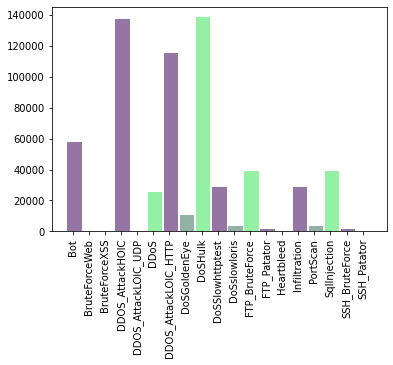

<Figure size 432x288 with 0 Axes>

In [ ]:
# distribution and the number of occured attacks in the initial dataset
# Create bars

barWidth = 0.9
bars1 = len(YM_test_Bot)
bars2 = len(YM_test_BruteForceWeb)
bars3 = len(YM_test_BruteForceXSS)
bars4 = len(YM_test_DDOS_AttackHOIC)
bars5 = len(YM_test_DDOS_AttackLOIC_UDP)
bars6 = len(YM_test_DDoS)
bars7 = len(YM_test_DDOS_AttackLOIC_HTTP)
bars8 = len(YM_test_DoSGoldenEye)
bars9 = len(YM_test_DoSHulk)
bars10 = len(YM_test_DoSSlowhttptest)
bars11 = len(YM_test_DoSslowloris)
bars12 = len(YM_test_FTP_BruteForce)
bars13 = len(YM_test_FTP_Patator)
bars14 = len(YM_test_Heartbleed)
bars15 = len(YM_test_Infiltration)
bars16 = len(YM_test_PortScan)
bars17 = len(YM_test_SqlInjection)
bars18 = len(YM_test_SSH_BruteForce)
bars19 = len(YM_test_SSH_Patator)


 
# The X position of bars
r1 = [1]
r2 = [2]
r3 = [3]
r4 = [4]
r5 = [5]
r6 = [6]
r7 = [7]
r8 = [8]
r9 = [9]
r10 = [10]
r11 = [11]
r12 = [12]
r13 = [13]
r14 = [14]
r15 = [15]
r16 = [16]
r17 = [17]
r18 = [18]
r19 = [19]

#r15 = r1 + r2 + r3 + r4 + r5 + r6 + r7 + r8 + r9 + r10 + r11 + r12 + r13 + r14
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Bot')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='BruteForceWeb')
plt.bar(r3, bars3, width = barWidth, color = (0.3,0.9,0.4,0.6), label='BruteForceXSS')
plt.bar(r4, bars4, width = barWidth, color = (0.3,0.1,0.4,0.6), label='DDOS_AttackHOIC')
plt.bar(r5, bars5, width = barWidth, color = (0.3,0.5,0.4,0.6), label='DDOS_AttackLOIC_UDP')
plt.bar(r6, bars6, width = barWidth, color = (0.3,0.9,0.4,0.6), label='DDoS')
plt.bar(r7, bars7, width = barWidth, color = (0.3,0.1,0.4,0.6), label='DDOS_AttackLOIC_HTTP')
plt.bar(r8, bars8, width = barWidth, color = (0.3,0.5,0.4,0.6), label='DoSGoldenEye')
plt.bar(r9, bars9, width = barWidth, color = (0.3,0.9,0.4,0.6), label='DoSHulk')
plt.bar(r10, bars10, width = barWidth, color = (0.3,0.1,0.4,0.6), label='DoSSlowhttptest')
plt.bar(r11, bars11, width = barWidth, color = (0.3,0.5,0.4,0.6), label='DoSslowloris')
plt.bar(r12, bars12, width = barWidth, color = (0.3,0.9,0.4,0.6), label='FTP_BruteForce')
plt.bar(r13, bars13, width = barWidth, color = (0.3,0.1,0.4,0.6), label='FTP_Patator')
plt.bar(r14, bars14, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Heartbleed')
plt.bar(r15, bars10, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Infiltration')
plt.bar(r16, bars11, width = barWidth, color = (0.3,0.5,0.4,0.6), label='PortScan')
plt.bar(r17, bars12, width = barWidth, color = (0.3,0.9,0.4,0.6), label='SqlInjection')
plt.bar(r18, bars13, width = barWidth, color = (0.3,0.1,0.4,0.6), label='SSH_BruteForce')
plt.bar(r19, bars14, width = barWidth, color = (0.3,0.1,0.4,0.6), label='SSH_Patator')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
#plt.legend()

# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(19)], ['Bot', 'BruteForceWeb', 'BruteForceXSS','DDOS_AttackHOIC', 'DDOS_AttackLOIC_UDP', 'DDoS', 'DDOS_AttackLOIC_HTTP', 'DoSGoldenEye', 
                                               'DoSHulk', 'DoSSlowhttptest', 'DoSslowloris', 'FTP_BruteForce', 'FTP_Patator','Heartbleed','Infiltration','PortScan',
                                               'SqlInjection','SSH_BruteForce','SSH_Patator'], rotation=90)

# Create labels
#label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11', 'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
 
# Text on the top of each barplot
#for i in range(len(r15)):
#  plt.text(x = r15[i]-0.5 , y = bars15[i]+0.1, s = label[i], size = 6)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()

plt.savefig('ClaseAtacuri.jpeg')

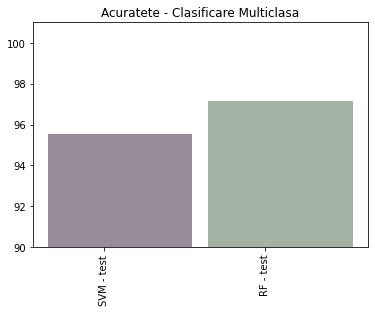

In [ ]:
# accuracy % shown in a barplot for each algorithm(LinearSVC and RandomForest)
from sklearn.metrics import accuracy_score
barWidth = 0.9
bars1 = accuracy_score(y_actual_test_multiclass, y_predict2_test_multiclass)*100
bars2 = accuracy_score(y_actual_test_multiclass, y_predict3_test_multiclass)*100
y = []
y.append(bars1)
y.append(bars2)

r1 = [1]
r2 = [2]

plt.bar(r1, bars1, width = barWidth, color = (0.2,0.1,0.2,0.5), label='SVM - test')
plt.bar(r2, bars2, width = barWidth, color = (0.4,0.5,0.4,0.6), label='RF - test')

plt.xticks([r + barWidth for r in range(2)], ['SVM - test','RF - test'], rotation=90)
plt.ylim([90, 101])
plt.title("Accuracy - Multiclass classification")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()

In [ ]:
#DoSHulk, DDoS_AttackHOIC, DDoS_AttachLOIC_HTTP, Bot
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

y_predict2_DDOS_AttackLOIC_HTTP = clf_svm.predict(XM_test_DDOS_AttackLOIC_HTTP_normalized)

y_predict2_DoSHulk = clf_svm.predict(XM_test_DoSHulk_normalized)

y_predict2_DDOS_AttackHOIC = clf_svm.predict(XM_test_DDOS_AttackHOIC_normalized)

y_predict2_Bot = clf_svm.predict(XM_test_Bot_normalized)


y_predict3_DDOS_AttackLOIC_HTTP = clf_rf.predict(XM_test_DDOS_AttackLOIC_HTTP_normalized)

y_predict3_DoSHulk = clf_rf.predict(XM_test_DoSHulk_normalized)

y_predict3_DDOS_AttackHOIC = clf_rf.predict(XM_test_DDOS_AttackHOIC_normalized)

y_predict3_Bot = clf_rf.predict(XM_test_Bot_normalized)

In [ ]:
acc3_DDOS_AttackLOIC_HTTP = accuracy_score(YM_test_DDOS_AttackLOIC_HTTP, y_predict3_DDOS_AttackLOIC_HTTP)
acc3_DoSHulk = accuracy_score(YM_test_DoSHulk, y_predict3_DoSHulk)
acc3_DDOS_AttackHOIC = accuracy_score(YM_test_DDOS_AttackHOIC, y_predict3_DDOS_AttackHOIC)
acc3_Bot = accuracy_score(YM_test_Bot, y_predict3_Bot)
acc2_DDOS_AttackLOIC_HTTP = accuracy_score(YM_test_DDOS_AttackLOIC_HTTP, y_predict2_DDOS_AttackLOIC_HTTP)
acc2_DoSHulk = accuracy_score(YM_test_DoSHulk, y_predict2_DoSHulk)
acc2_DDOS_AttackHOIC = accuracy_score(YM_test_DDOS_AttackHOIC, y_predict2_DDOS_AttackHOIC)
acc2_Bot = accuracy_score(YM_test_Bot, y_predict2_Bot)


prec3_DDOS_AttackLOIC_HTTP = precision_score(YM_test_DDOS_AttackLOIC_HTTP, y_predict3_DDOS_AttackLOIC_HTTP, average='weighted')
prec3_DoSHulk = precision_score(YM_test_DoSHulk, y_predict3_DoSHulk,average='weighted')
prec3_DDOS_AttackHOIC = precision_score(YM_test_DDOS_AttackHOIC, y_predict3_DDOS_AttackHOIC,average='weighted')
prec3_Bot = precision_score(YM_test_Bot, y_predict3_Bot,average='weighted')
prec2_DDOS_AttackLOIC_HTTP = precision_score(YM_test_DDOS_AttackLOIC_HTTP, y_predict2_DDOS_AttackLOIC_HTTP, average='weighted')
prec2_DoSHulk = precision_score(YM_test_DoSHulk, y_predict2_DoSHulk,average='weighted')
prec2_DDOS_AttackHOIC = precision_score(YM_test_DDOS_AttackHOIC, y_predict2_DDOS_AttackHOIC,average='weighted')
prec2_Bot = precision_score(YM_test_Bot, y_predict2_Bot,average='weighted')


rec3_DDOS_AttackLOIC_HTTP = recall_score(YM_test_DDOS_AttackLOIC_HTTP, y_predict3_DDOS_AttackLOIC_HTTP, average='weighted', zero_division = 0)
rec3_DoSHulk = recall_score(YM_test_DoSHulk, y_predict3_DoSHulk, average='weighted', zero_division = 0)
rec3_DDOS_AttackHOIC = recall_score(YM_test_DDOS_AttackHOIC, y_predict3_DDOS_AttackHOIC, average='weighted', zero_division = 0)
rec3_Bot = recall_score(YM_test_Bot, y_predict3_Bot, average='weighted', zero_division = 0)
rec2_DDOS_AttackLOIC_HTTP = recall_score(YM_test_DDOS_AttackLOIC_HTTP, y_predict2_DDOS_AttackLOIC_HTTP, average='weighted', zero_division = 0)
rec2_DoSHulk = recall_score(YM_test_DoSHulk, y_predict2_DoSHulk, average='weighted', zero_division = 0)
rec2_DDOS_AttackHOIC = recall_score(YM_test_DDOS_AttackHOIC, y_predict2_DDOS_AttackHOIC, average='weighted', zero_division = 0)
rec2_Bot = recall_score(YM_test_Bot, y_predict2_Bot, average='weighted', zero_division = 0)

print("Masurile de performanta pentru cele 3 atacuri detectate cu RF sunt:")
print("Acuratete - DDOS_AttackLOIC_HTTP:"+str(acc3_DDOS_AttackLOIC_HTTP))
print("Acuratete - DoSHulk:"+str(acc3_DoSHulk))
print("Acuratete - DDOS_AttackHOIC:"+str(acc3_DDOS_AttackHOIC))
print("Acuratete - Bot:"+str(acc3_Bot))

print("Precizie - DDOS_AttackLOIC_HTTP:"+str(prec3_DDOS_AttackLOIC_HTTP))
print("Precizie - DoSHulk:"+str(prec3_DoSHulk))
print("Precizie - DDOS_AttackHOIC:"+str(prec3_DDOS_AttackHOIC))
print("Precizie - Bot:"+str(prec3_Bot))

print("Recall - DDOS_AttackLOIC_HTTP:"+str(rec3_DDOS_AttackLOIC_HTTP))
print("Recall - DoSHulk:"+str(rec3_DoSHulk))
print("Recall - DDOS_AttackHOIC:"+str(rec3_DDOS_AttackHOIC))
print("Recall - Bot:"+str(rec3_Bot))
print("-----------------------------------------------------------------------")
print("Masurile de performanta pentru cele 3 atacuri detectate cu SVM sunt:")
print("Acuratete - DDOS_AttackLOIC_HTTP:"+str(acc2_DDOS_AttackLOIC_HTTP))
print("Acuratete - DoSHulk:"+str(acc2_DoSHulk))
print("Acuratete - DDOS_AttackHOIC:"+str(acc2_DDOS_AttackHOIC))
print("Acuratete - Bot:"+str(acc2_Bot))

print("Precizie - DDOS_AttackLOIC_HTTP:"+str(prec2_DDOS_AttackLOIC_HTTP))
print("Precizie - DoSHulk:"+str(prec2_DoSHulk))
print("Precizie - DDOS_AttackHOIC:"+str(prec2_DDOS_AttackHOIC))
print("Precizie - Bot:"+str(prec2_Bot))

print("Recall - DDOS_AttackLOIC_HTTP:"+str(rec2_DDOS_AttackLOIC_HTTP))
print("Recall - DoSHulk:"+str(rec2_DoSHulk))
print("Recall - DDOS_AttackHOIC:"+str(rec2_DDOS_AttackHOIC))
print("Recall - Bot:"+str(rec2_Bot))

Masurile de performanta pentru cele 3 atacuri detectate cu RF sunt:
Acuratete - DDOS_AttackLOIC_HTTP:0.9992539514547947
Acuratete - DoSHulk:0.9999566022451105
Acuratete - DDOS_AttackHOIC:0.9999927015822969
Acuratete - Bot:0.9998087122858882
Precizie - DDOS_AttackLOIC_HTTP:1.0
Precizie - DoSHulk:1.0
Precizie - DDOS_AttackHOIC:1.0
Acuratete - Bot:1.0
Recall - DDOS_AttackLOIC_HTTP:0.9992539514547947
Recall - DoSHulk:0.9999566022451105
Recall - DDOS_AttackHOIC:0.9999927015822969
Acuratete - Bot:0.9998087122858882
-----------------------------------------------------------------------
Masurile de performanta pentru cele 3 atacuri detectate cu SVM sunt:
Acuratete - DDOS_AttackLOIC_HTTP:0.9890955462636848
Acuratete - DoSHulk:0.9962460942020599
Acuratete - DDOS_AttackHOIC:0.999985403164594
Acuratete - Bot:0.9928701852012869
Precizie - DDOS_AttackLOIC_HTTP:1.0
Precizie - DoSHulk:1.0
Precizie - DDOS_AttackHOIC:1.0
Acuratete - Bot:1.0
Recall - DDOS_AttackLOIC_HTTP:0.9890955462636848
Recall - DoSH

-----------------------------------------------------------------------


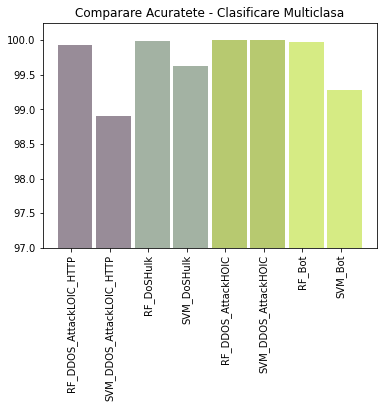

-----------------------------------------------------------------------


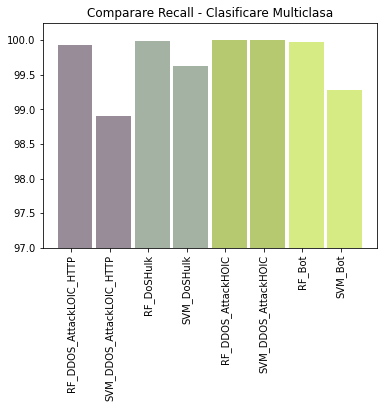

-----------------------------------------------------------------------


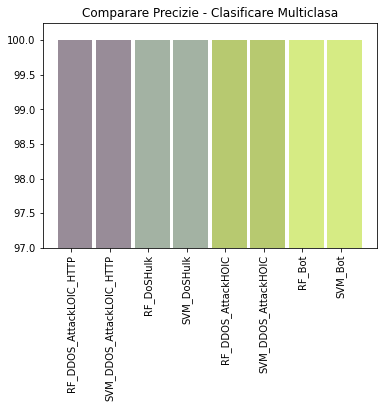

In [ ]:
# comparing performance metrics(like accuracy, recall, precision) for top 4 attacks(with the biggest no of occurence)
# each performance metric is made for both algorithms
print("-----------------------------------------------------------------------")
barWidth = 0.9
bars1 = acc3_DDOS_AttackLOIC_HTTP*100
bars2 = acc3_DoSHulk*100
bars3 = acc3_DDOS_AttackHOIC*100
bars4 = acc3_Bot*100
bars_1 = acc2_DDOS_AttackLOIC_HTTP*100
bars_2 = acc2_DoSHulk*100
bars_3 = acc2_DDOS_AttackHOIC*100
bars_4 = acc2_Bot*100

y = []
y.append(bars1)
y.append(bars_1)
y.append(bars2)
y.append(bars_2)
y.append(bars3)
y.append(bars_3)
y.append(bars4)
y.append(bars_4)

r1 = [1]
r_1 = [2]
r2 = [3]
r_2 = [4]
r3 = [5]
r_3 = [6]
r4 = [7]
r_4 = [8]


plt.bar(r1, bars1, width = barWidth, color = (0.2,0.1,0.2,0.5), label='RF_DDOS_AttackLOIC_HTTP')
plt.bar(r_1, bars_1, width = barWidth, color = (0.2,0.1,0.2,0.5), label='SVM_DDOS_AttackLOIC_HTTP')

plt.bar(r2, bars2, width = barWidth, color = (0.4,0.5,0.4,0.6), label='RF_DoSHulk')
plt.bar(r_2, bars_2, width = barWidth, color = (0.4,0.5,0.4,0.6), label='SVM_DoSHulk')

plt.bar(r3, bars3, width = barWidth, color = (0.6,0.7,0.2,0.7), label='RF_DDOS_AttackHOIC')
plt.bar(r_3, bars_3, width = barWidth, color = (0.6,0.7,0.2,0.7), label='SVM_DDOS_AttackHOIC')

plt.bar(r4, bars4, width = barWidth, color = (0.8,0.9,0.4,0.8), label='RF_Bot')
plt.bar(r_4, bars_4, width = barWidth, color = (0.8,0.9,0.4,0.8), label='SVM_Bot')


plt.xticks([r + barWidth for r in range(8)], ['RF_DDOS_AttackLOIC_HTTP','SVM_DDOS_AttackLOIC_HTTP','RF_DoSHulk','SVM_DoSHulk',
                                              'RF_DDOS_AttackHOIC','SVM_DDOS_AttackHOIC','RF_Bot','SVM_Bot'], rotation=90)
plt.ylim([97, 100.25])
plt.title("Comparing Accuracy - Multiclass classification")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()
print("-----------------------------------------------------------------------")
barWidth = 0.9
bars111 = rec3_DDOS_AttackLOIC_HTTP*100
bars222 = rec3_DoSHulk*100
bars333 = rec3_DDOS_AttackHOIC*100
bars444 = rec3_Bot*100
bars_111 = rec2_DDOS_AttackLOIC_HTTP*100
bars_222 = rec2_DoSHulk*100
bars_333 = rec2_DDOS_AttackHOIC*100
bars_444 = rec2_Bot*100

y = []
y.append(bars111)
y.append(bars_111)
y.append(bars222)
y.append(bars_222)
y.append(bars333)
y.append(bars_333)
y.append(bars444)
y.append(bars_444)

r111 = [1]
r_111 = [2]
r222 = [3]
r_222 = [4]
r333 = [5]
r_333 = [6]
r444 = [7]
r_444 = [8]

plt.bar(r111, bars111, width = barWidth, color = (0.2,0.1,0.2,0.5), label='RF_DDOS_AttackLOIC_HTTP')
plt.bar(r_111, bars_111, width = barWidth, color = (0.2,0.1,0.2,0.5), label='SVM_DDOS_AttackLOIC_HTTP')
plt.bar(r222, bars222, width = barWidth, color = (0.4,0.5,0.4,0.6), label='RF_DoSHulk')
plt.bar(r_222, bars_222, width = barWidth, color = (0.4,0.5,0.4,0.6), label='SVM_DoSHulk')
plt.bar(r333, bars333, width = barWidth, color = (0.6,0.7,0.2,0.7), label='RF_DDOS_AttackHOIC')
plt.bar(r_333, bars_333, width = barWidth, color = (0.6,0.7,0.2,0.7), label='SVM_DDOS_AttackHOIC')
plt.bar(r444, bars444, width = barWidth, color = (0.8,0.9,0.4,0.8), label='RF_Bot')
plt.bar(r_444, bars_444, width = barWidth, color = (0.8,0.9,0.4,0.8), label='SVM_Bot')


plt.xticks([r + barWidth for r in range(8)], ['RF_DDOS_AttackLOIC_HTTP','SVM_DDOS_AttackLOIC_HTTP','RF_DoSHulk','SVM_DoSHulk',
                                              'RF_DDOS_AttackHOIC','SVM_DDOS_AttackHOIC','RF_Bot','SVM_Bot'], rotation=90)
plt.ylim([97, 100.25])
plt.title("Comparing Recall - Multiclass classification")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()
print("-----------------------------------------------------------------------")
barWidth = 0.9
bars11 = prec3_DDOS_AttackLOIC_HTTP*100
bars22 = prec3_DoSHulk*100
bars33 = prec3_DDOS_AttackHOIC*100
bars44 = prec3_Bot*100

bars_11 = prec2_DDOS_AttackLOIC_HTTP*100
bars_22 = prec2_DoSHulk*100
bars_33 = prec2_DDOS_AttackHOIC*100
bars_44 = prec2_Bot*100

y = []
y.append(bars11)
y.append(bars_11)
y.append(bars22)
y.append(bars_22)
y.append(bars33)
y.append(bars_33)
y.append(bars44)
y.append(bars_44)

r11 = [1]
r_11 = [2]
r22 = [3]
r_22 = [4]
r33 = [5]
r_33 = [6]
r44 = [7]
r_44 = [8]

plt.bar(r11, bars11, width = barWidth, color = (0.2,0.1,0.2,0.5), label='RF_DDOS_AttackLOIC_HTTP')
plt.bar(r_11, bars_11, width = barWidth, color = (0.2,0.1,0.2,0.5), label='SVM_DDOS_AttackLOIC_HTTP')
plt.bar(r22, bars22, width = barWidth, color = (0.4,0.5,0.4,0.6), label='RF_DoSHulk')
plt.bar(r_22, bars_22, width = barWidth, color = (0.4,0.5,0.4,0.6), label='SVM_DoSHulk')
plt.bar(r33, bars33, width = barWidth, color = (0.6,0.7,0.2,0.7), label='RF_DDOS_AttackHOIC')
plt.bar(r_33, bars_33, width = barWidth, color = (0.6,0.7,0.2,0.7), label='SVM_DDOS_AttackHOIC')
plt.bar(r44, bars44, width = barWidth, color = (0.8,0.9,0.4,0.8), label='RF_Bot')
plt.bar(r_44, bars_44, width = barWidth, color = (0.8,0.9,0.4,0.8), label='SVM_Bot')

plt.xticks([r + barWidth for r in range(8)], ['RF_DDOS_AttackLOIC_HTTP','SVM_DDOS_AttackLOIC_HTTP','RF_DoSHulk','SVM_DoSHulk',
                                              'RF_DDOS_AttackHOIC','SVM_DDOS_AttackHOIC','RF_Bot','SVM_Bot'], rotation=90)
plt.ylim([97, 100.25])
plt.title("Comparing Precizie - Multiclass classsification")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()

In [ ]:
### OTHER METHODS - CODE CHANGES AND SO OTHER NONSENSE ###

In [ ]:
# print(df.npartitions)
# print("---"*50+"\nBENIGN:"+str(len(df_label1[df_label1=='BENIGN'])))
# print(df_label1[df_label1=='BENIGN'].head(npartitions=30))
# print(df_label2[df_label2==0].head(npartitions=30))

# print("---"*50+"\nBot:"+str(len(df_label1[df_label1=='Bot'])))
# print(df_label1[df_label1=='Bot'].head(npartitions=30))
# print(df_label2[df_label2==1].head(npartitions=30))

# print("---"*50+"\nBrute Force -Web:"+str(len(df_label1[df_label1=='Brute Force -Web'])))
# print(df_label1[df_label1=='Brute Force -Web'].head(npartitions=30))
# print(df_label2[df_label2==2].head(npartitions=30))

# print("---"*50+"\nBrute Force -XSS:"+str(len(df_label1[df_label1=='Brute Force -XSS'])))
# print(df_label1[df_label1=='Brute Force -XSS'].head(npartitions=30))
# print(df_label2[df_label2==3].head(npartitions=30))

# print("---"*50+"\nDDOS attack-HOIC:"+str(len(df_label1[df_label1=='DDOS attack-HOIC'])))
# print(df_label1[df_label1=='DDOS attack-HOIC'].head(npartitions=30))
# print(df_label2[df_label2==4].head(npartitions=30))

# print("---"*50+"\nDDOS attack-LOIC-UDP:"+str(len(df_label1[df_label1=='DDOS attack-LOIC-UDP'])))
# print(df_label1[df_label1=='DDOS attack-LOIC-UDP'].head(npartitions=30))
# print(df_label2[df_label2==5].head(npartitions=30))

# print("---"*50+"\nDDoS:"+str(len(df_label1[df_label1=='DDoS'])))
# print(df_label1[df_label1=='DDoS'].head(npartitions=30))
# print(df_label2[df_label2==6].head(npartitions=30))

# print("---"*50+"\nDDoS attacks-LOIC-HTTP:"+str(len(df_label1[df_label1=='DDoS attacks-LOIC-HTTP'])))
# print(df_label1[df_label1=='DDoS attacks-LOIC-HTTP'].head(npartitions=30))
# print(df_label2[df_label2==7].head(npartitions=30))

# print("---"*50+"\nDoS attacks-GoldenEye:"+str(len(df_label1[df_label1=='DoS attacks-GoldenEye'])))
# print(df_label1[df_label1=='DoS attacks-GoldenEye'].head(npartitions=30))
# print(df_label2[df_label2==8].head(npartitions=30))

# print("---"*50+"\nDoS attacks-Hulk:"+str(len(df_label1[df_label1=='DoS attacks-Hulk'])))
# print(df_label1[df_label1=='DoS attacks-Hulk'].head(npartitions=30))
# print(df_label2[df_label2==9].head(npartitions=30))

# print("---"*50+"\nDoS attacks-SlowHTTPTest:"+str(len(df_label1[df_label1=='DoS attacks-SlowHTTPTest'])))
# print(df_label1[df_label1=='DoS attacks-SlowHTTPTest'].head(npartitions=30))
# print(df_label2[df_label2==10].head(npartitions=30))

# print("---"*50+"\nDoS attacks-Slowloris:"+str(len(df_label1[df_label1=='DoS attacks-Slowloris'])))
# print(df_label1[df_label1=='DoS attacks-Slowloris'].head(npartitions=30))
# print(df_label2[df_label2==11].head(npartitions=30))

# print("---"*50+"\nFTP-BruteForce:"+str(len(df_label1[df_label1=='FTP-BruteForce'])))
# print(df_label1[df_label1=='FTP-BruteForce'].head(npartitions=30))
# print(df_label2[df_label2==12].head(npartitions=30))

# print("---"*50+"\nFTP-Patator:"+str(len(df_label1[df_label1=='FTP-Patator'])))
# print(df_label1[df_label1=='FTP-Patator'].head(npartitions=30))
# print(df_label2[df_label2==13].head(npartitions=30))

# print("---"*50+"\nHeartbleed:"+str(len(df_label1[df_label1=='Heartbleed'])))
# print(df_label1[df_label1=='Heartbleed'].head(npartitions=30))
# print(df_label2[df_label2==14].head(npartitions=30))

# print("---"*50+"\nInfilteration:"+str(len(df_label1[df_label1=='Infilteration'])))
# print(df_label1[df_label1=='Infilteration'].head(npartitions=30))
# print(df_label2[df_label2==15].head(npartitions=30))

# print("---"*50+"\nPortScan:"+str(len(df_label1[df_label1=='PortScan'])))
# print(df_label1[df_label1=='PortScan'].head(npartitions=30))
# print(df_label2[df_label2==16].head(npartitions=30))

# print("---"*50+"\nSQL Injection:"+str(len(df_label1[df_label1=='SQL Injection'])))
# print(df_label1[df_label1=='SQL Injection'].head(npartitions=30))
# print(df_label2[df_label2==17].head(npartitions=30))

# print("---"*50+"\nSSH-Bruteforce:"+str(len(df_label1[df_label1=='SSH-Bruteforce'])))
# print(df_label1[df_label1=='SSH-Bruteforce'].head(npartitions=30))
# print(df_label2[df_label2==18].head(npartitions=30))

# print("---"*50+"\nSSH-Patator:"+str(len(df_label1[df_label1=='SSH-Patator'])))
# print(df_label1[df_label1=='SSH-Patator'].head(npartitions=30))
# print(df_label2[df_label2==19].head(npartitions=30))


30
------------------------------------------------------------------------------------------------------------------------------------------------------
BENIGN:2619636
0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: Label_Category, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Bot:288157
170602    Bot
170603    Bot
170604    Bot
170605    Bot
170606    Bot
Name: Label, dtype: object
170602    1
170603    1
170604    1
170605    1
170606    1
Name: Label_Category, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Brute Force -Web:2118
172604    Brute Force -Web
172605    Brute Force -Web
172606    Brute Force -Web
172607    Brute Force -Web
172608    Brute Force -Web
Name: Label,